# Data analysis and visualization

This notebook is an example data analysis and visualization of a fictional starbucks dataset.

## Python csomagok

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme(style = "darkgrid")

## Adatbetöltés és feltérképezés

In [158]:
data = pd.read_csv("starbucks_data.csv",sep=';')
data.head(5)

,ID,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Total Carbohydrates (g),Sugars (g),Protein (g),Caffeine (mg)
0,4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70.0,0.1,75.0,9.0,6.0,75.0
1,5,Classic Espresso Drinks,Caffè Latte,2% Milk,100.0,3.5,85.0,9.0,6.0,75.0
2,6,Classic Espresso Drinks,Caffè Latte,Soymilk,70.0,2.5,65.0,4.0,5.0,75.0
3,7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100.0,0.2,120.0,14.0,10.0,75.0
4,8,Classic Espresso Drinks,Caffè Latte,2% Milk,150.0,6.0,135.0,14.0,10.0,75.0


## Az adatokat a következőképpen kell értelmezni:

| Oszlop neve                | Leírás                                                  | Példa                           |
|----------------------------|---------------------------------------------------------|---------------------------------|
| ID                         | Az ital egyedi azonosítója, egész szám.                 | 4                               |
| Beverage_category          | Az ital kategóriája, szöveges formátumú.               | Classic Espresso Drinks         |
| Beverage                   | Az ital neve, szöveges formátumú.                       | Caffè Latte                     |
| Beverage_prep              | Az ital előkészítési módja, szöveges formátumú.         | Short Nonfat Milk               |
| Calories                   | Az ital kalóriatartalma, lebegőpontos szám.             | 70.0                            |
| Total Fat (g)              | Az ital teljes zsírtartalma grammban, lebegőpontos szám. | 0.1                           |
| Total Carbohydrates (g)    | Az ital teljes szénhidráttartalma grammban, lebegőpontos szám. | 75.0                         |
| Sugars (g)                 | Az ital cukortartalma grammban, lebegőpontos szám.    | 9.0                             |
| Protein (g)                | Az ital fehérjetartalma grammban, lebegőpontos szám.  | 6.0                             |
| Caffeine (mg)              | Az ital koffeintartalma milligrammban, lebegőpontos szám. | 75.0                         |


## Hibás értékek kezelése

In [159]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       52 non-null     int64  
 1   Beverage_category        52 non-null     object 
 2   Beverage                 52 non-null     object 
 3   Beverage_prep            52 non-null     object 
 4   Calories                 40 non-null     float64
 5   Total Fat (g)            39 non-null     float64
 6   Total Carbohydrates (g)  39 non-null     float64
 7   Sugars (g)               39 non-null     float64
 8   Protein (g)              39 non-null     float64
 9   Caffeine (mg)            37 non-null     float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.2+ KB


,ID,Calories,Total Fat (g),Total Carbohydrates (g),Sugars (g),Protein (g),Caffeine (mg)
count,52.000000,40.000000,39.000000,39.000000,39.000000,39.000000,37.000000
mean,30.884615,181.250000,3.043590,117.948718,26.794872,12.871795,111.486486
std,16.941252,286.232714,2.742434,45.993677,70.235386,16.359738,38.003378
min,4.000000,50.000000,0.100000,40.000000,3.000000,3.000000,75.000000
25%,16.750000,97.500000,0.300000,80.000000,8.000000,6.000000,75.000000
50%,29.500000,120.000000,3.000000,120.000000,14.000000,9.000000,75.000000
75%,46.250000,175.000000,5.000000,150.000000,21.500000,12.000000,150.000000
max,61.000000,1900.000000,9.000000,220.000000,450.000000,90.000000,150.000000


Látjuk hogy vannak null értékek, ezeket az adott oszlop átlagával helyettesítjük, miután az szélsőértékeket kiszűrtük a szórás alapján.


In [160]:
# duplikált értékek szűrése
data = data.drop_duplicates()

# Outlierek szűrése
data = data[np.abs(data["Calories"]-data["Calories"].mean())<=(3*data["Calories"].std())]
data = data[np.abs(data["Total Fat (g)"]-data["Total Fat (g)"].mean())<=(3*data["Total Fat (g)"].std())]
data = data[np.abs(data["Total Carbohydrates (g)"]-data["Total Carbohydrates (g)"].mean())<=(3*data["Total Carbohydrates (g)"].std())]
data = data[np.abs(data["Sugars (g)"]-data["Sugars (g)"].mean())<=(3*data["Sugars (g)"].std())]
data = data[np.abs(data["Protein (g)"]-data["Protein (g)"].mean())<=(3*data["Protein (g)"].std())]
data = data[np.abs(data["Caffeine (mg)"]-data["Caffeine (mg)"].mean())<=(3*data["Caffeine (mg)"].std())]

# NaN értékek szűrése
data['Calories'].fillna(data['Calories'].mean(), inplace=True)
data['Total Fat (g)'].fillna(data['Total Fat (g)'].mean(), inplace=True)
data['Total Carbohydrates (g)'].fillna(data['Total Carbohydrates (g)'].mean(), inplace=True)
data['Sugars (g)'].fillna(data['Sugars (g)'].mean(), inplace=True)
data['Protein (g)'].fillna(data['Protein (g)'].mean(), inplace=True)
data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean(), inplace=True)

# Mivel a Beverage_category csak 1 értéket tartalmaz, ezért azt elhagyjuk
data = data.drop(columns=['Beverage_category'])

In [161]:
data

,ID,Beverage,Beverage_prep,Calories,Total Fat (g),Total Carbohydrates (g),Sugars (g),Protein (g),Caffeine (mg)
0,4,Caffè Latte,Short Nonfat Milk,70.0,0.1,75.0,9.0,6.0,75.0
1,5,Caffè Latte,2% Milk,100.0,3.5,85.0,9.0,6.0,75.0
2,6,Caffè Latte,Soymilk,70.0,2.5,65.0,4.0,5.0,75.0
3,7,Caffè Latte,Tall Nonfat Milk,100.0,0.2,120.0,14.0,10.0,75.0
4,8,Caffè Latte,2% Milk,150.0,6.0,135.0,14.0,10.0,75.0
5,9,Caffè Latte,Soymilk,110.0,4.5,105.0,6.0,8.0,75.0
6,10,Caffè Latte,Grande Nonfat Milk,130.0,0.3,150.0,18.0,13.0,150.0
8,12,Caffè Latte,Soymilk,150.0,5.0,130.0,8.0,10.0,150.0
9,13,Caffè Latte,Venti Nonfat Milk,170.0,0.4,190.0,23.0,16.0,150.0
10,14,Caffè Latte,2% Milk,240.0,9.0,220.0,22.0,16.0,150.0


## Adatvizualizáció

### Koffein tartalom italok szerint

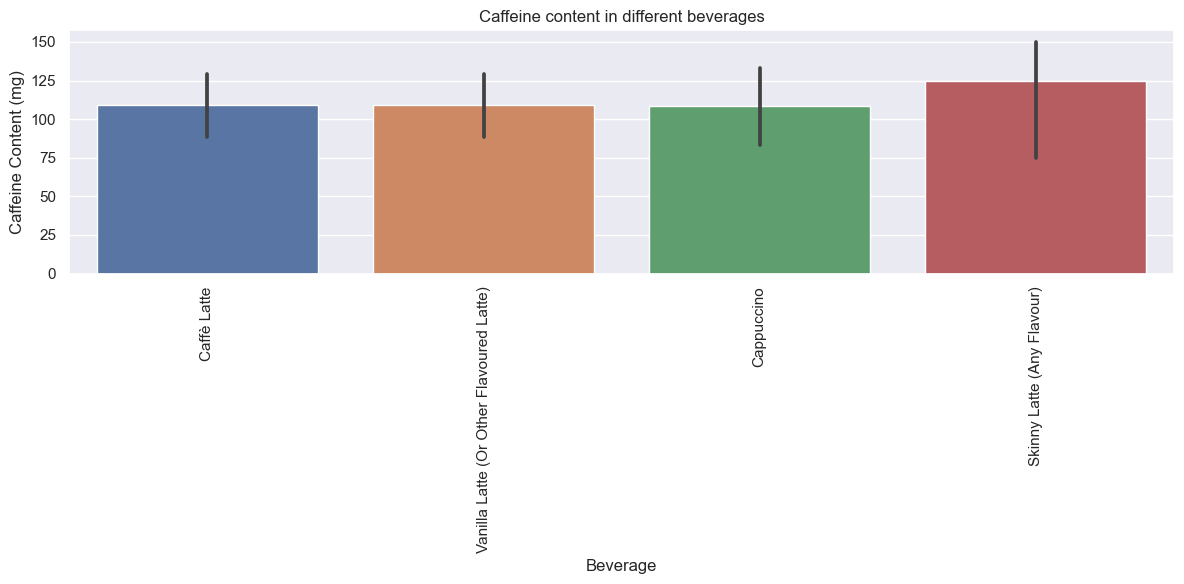

In [162]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Beverage', y='Caffeine (mg)', data=data)
plt.title('Caffeine content in different beverages')
plt.xlabel('Beverage')
plt.ylabel('Caffeine Content (mg)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Fehérje tartalom elkészítési módok szerint

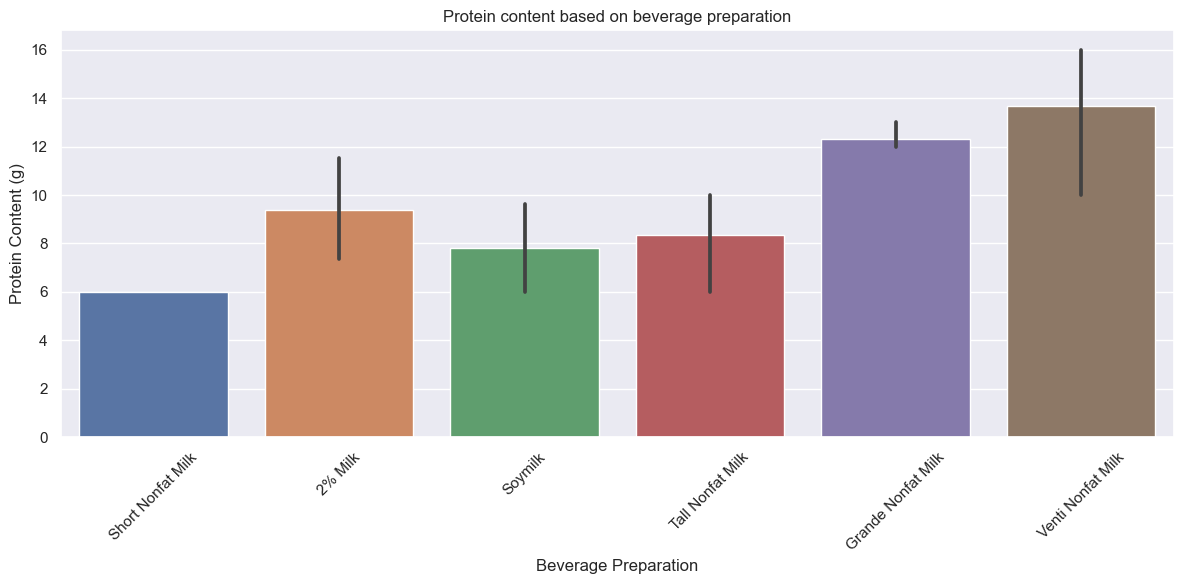

In [163]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Beverage_prep', y='Protein (g)', data=data)
plt.title('Protein content based on beverage preparation')
plt.xlabel('Beverage Preparation')
plt.ylabel('Protein Content (g)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Elkészítési módok megoszlása

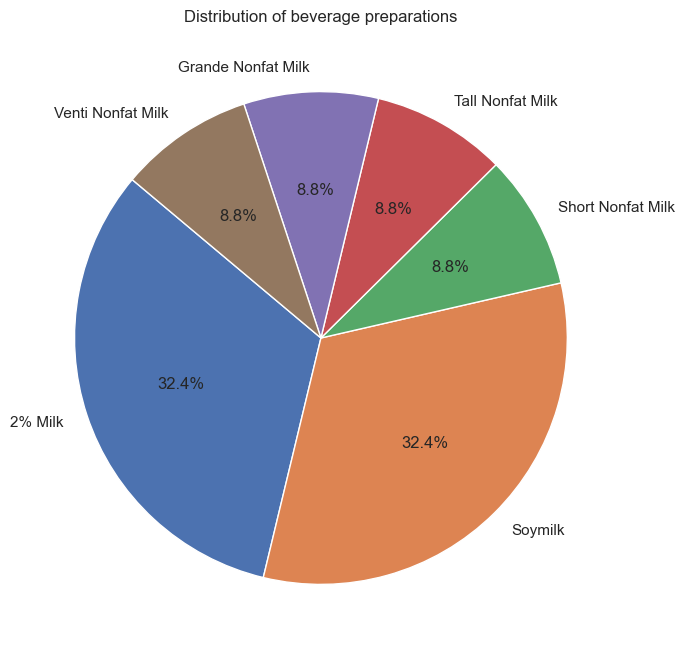

In [164]:
beverage_prep_counts = data['Beverage_prep'].value_counts()

plt.figure(figsize=(10, 8))
beverage_prep_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of beverage preparations')
plt.ylabel('')
plt.show()

### Kalória tartalom és cukor tartalom korrelációja

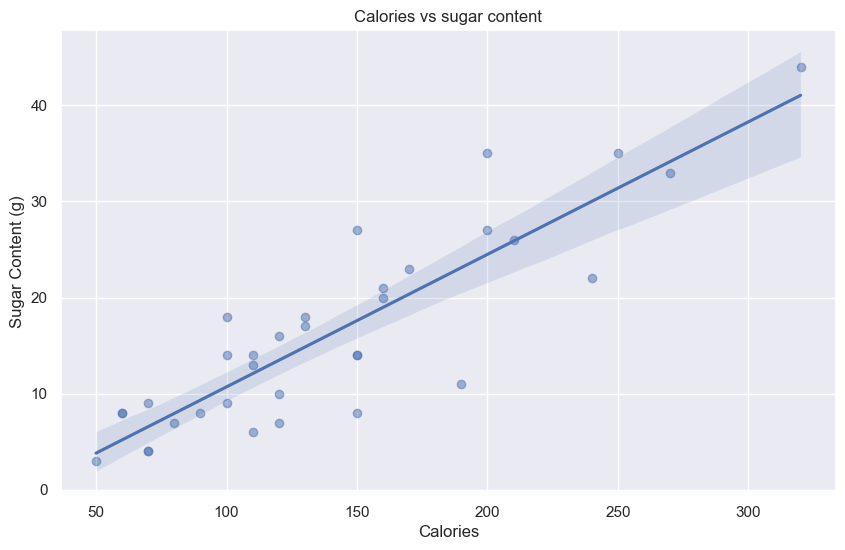

A kalória és a cukor közötti korreláció:  0.8771254609018775


In [165]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Calories', y='Sugars (g)', data=data, scatter_kws={'alpha':0.5})
plt.title('Calories vs sugar content')
plt.xlabel('Calories')
plt.ylabel('Sugar Content (g)')
plt.show()

correlation = data['Calories'].corr(data['Sugars (g)'])
print('A kalória és a cukor közötti korreláció: ', correlation)